In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [12]:
N = 2000
Xg = np.random.randn(N, 2)*1.5 + np.array([-1, -1])
Xm = np.random.randn(N, 2) + np.array([1, 1])
Xa = np.vstack([Xg, Xm])
L = np.array(['green']*N + ['magenta']*N)

df = pd.DataFrame({'x0': Xa[:,0], 'x1': Xa[:,1], 'color': L})
df_train, df_test = train_test_split(df)

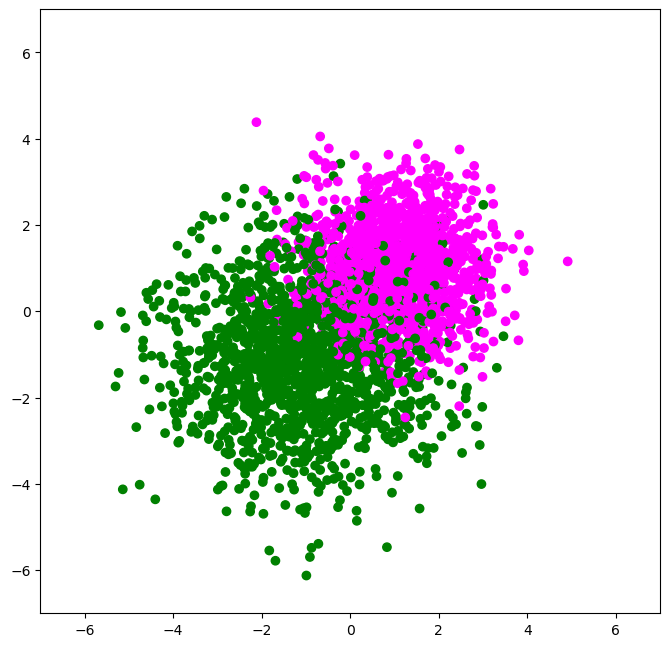

In [13]:
fig, ax = plt.subplots(1, figsize=(8,8), dpi=100)
ax.scatter(df_train['x0'], df_train['x1'], color=df_train['color'])

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
plt.show()

In [23]:
t = DecisionTreeClassifier(max_depth=3)
m = BaggingClassifier(t, n_estimators=5)
m.fit(df_train[['x0', 'x1']], df_train['color'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=5)

In [24]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

df_grid = pd.DataFrame({ 'x0': xx.flatten(), 'x1': yy.flatten() })
df_grid['color'] = m.predict(df_grid[['x0', 'x1']])

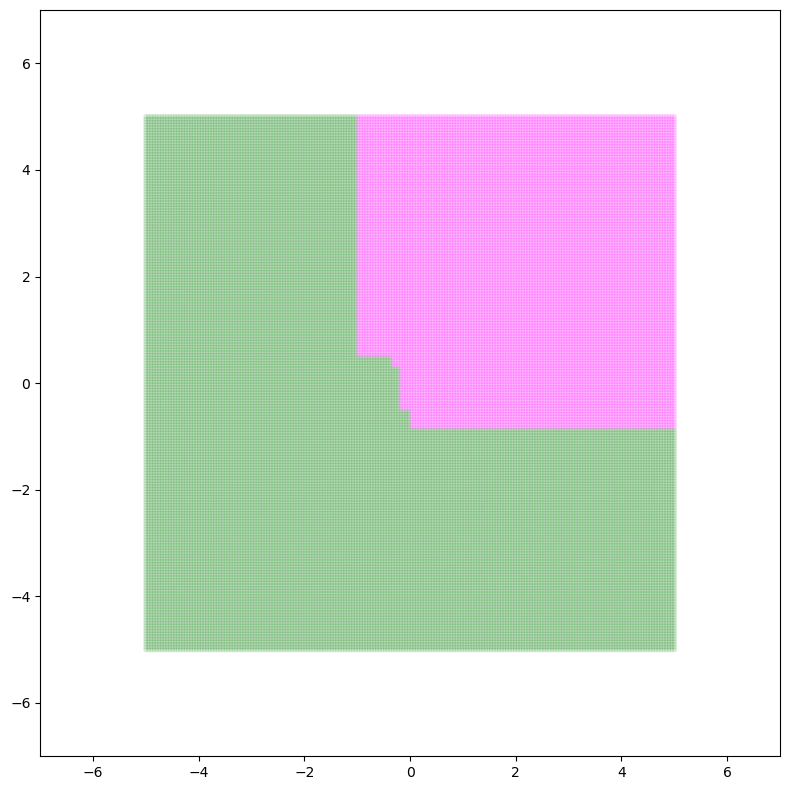

In [31]:
fig, ax = plt.subplots(1, figsize=(8,8), dpi=100)

ax.scatter(df_grid['x0'], df_grid['x1'], color=df_grid['color'], marker='.', alpha=0.1)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
plt.tight_layout()
plt.show()

In [17]:
train_score = m.score(df_train[['x0', 'x1']], df_train[['color']])
test_score = m.score(df_test[['x0', 'x1']], df_test[['color']])
print(f'{train_score=}')
print(f'{test_score=}')

train_score=0.8866666666666667
test_score=0.878


In [18]:
Lhat = m.predict(df_test[['x0', 'x1']])
confusion_matrix(df_test['color'], Lhat)

array([[414,  85],
       [ 37, 464]])